In [1]:
import statsmodels.api
import statsmodels.formula.api
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.datasets
import sklearn.svm
import sklearn.linear_model
import sklearn.model_selection

# Time-series Analysis

## Deterministic vs. Stochastic Processes

1. **What is a deterministic process?**: Next values depend on previous or known steps
2. **What is an example of a deterministic process?**:
3. **What is a stochastic process?**: Doesn't depend on previous steps, "random"
4. **Are most physical phenomena deterministic or stochastic?**: Stochastic

## Time-series patterns

1. **Stationarity**: mean and stdev constant over time
2. **Trend**: changes in mean over time
3. **Seasonality**: Systemic, periodic variation

![Air Passenger Data time-series example](air_log_transform.PNG)

*Figure 1: Air passenger time-series data and log transform of data.*

![Air Passenger Data time-series example](air_log_trend.png) ![Air Passenger Data time-series example](air_log_seasonality.png)

*Figure 2: Components for trend (left) of log transform of air data and seasonality (right) of log transform of air data.*


![Air Passenger Data time-series example](air_log_residual.png)

*Figure 3: Residual component of log transform of air data.*


## Forecasting time-series data

Using the log of the data can help with stabilizing standard deviation. Assuming stationarity with linear decomposition techniques:

$y_t = m_t + s_t + r_t$ where $y_t$ is the value of the time series, $m_t$ is the trend component, $s_t$ is the seasonality component, and $r_t$ is a residual component.

Try using `statsmodels.tsa.seasonal.seasonal_decompose()` with the `https://static-resources.zybooks.com/static/AirPassengers.csv` dataset:

## Error (cost or loss) functions for forecasting

- $e(x) = y_{true}(x) - y_{pred}(x)$
- **Mean squared error (MSE):** $\frac{1}{n} \sum_{i=1}^{n} e_i^2$
- **Mean absolute error (MAE):** $\frac{1}{n} \sum_{i=1}^{n} |e_i|$
- **Mean absolute percentage error (MAPE):** $100\% \cdot \frac{1}{n} \sum_{i=1}^{n} |\frac{e_i}{y_i}|$
- Even more metrics! See the [scikit-learn documentation](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics) for more.

Let's write functions for these using `numpy`:

In [2]:
def calc_mse(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    """
    Returns the mean squared error given y_true and y_pred.
    """
    return np.sum(np.square(y_true-y_pred)) * 1/(y_true.size)

# Supervised Machine Learning

## Getting started

- **Machine learning:** Generic term for computer algorithms that build models based on sample data
- **Task:** What the statistical model does (classification vs. regression vs. clustering)
- **Features:** Properties, attributes, or predictors of a dataset
- **Supervised learning:** Estimator optimization using known data labels ("correct" data)

We will be using the [`scikit-learn`](https://scikit-learn.org) library, which is shortened to `sklearn` in code. Go ahead and use `mamba` to install `scikit-learn`.

## Choosing the machine learning estimator to use

There's a [convenient chart](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) available on scikit-learn's documentation.  There's also a [massive list of all of the types of supervised learning](https://scikit-learn.org/stable/supervised_learning.html) that exists in `sklearn`.

## Trying out some regression on the Diabetes dataset

First, load the Diabetes dataset, using `sklearn.datasets.load_diabetes()` as a DataFrame:

In [3]:
df_diabetes = pd.read_csv('https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt',
                          sep='\t')
df_diabetes.columns = df_diabetes.columns.str.lower()
df_diabetes.head()
df_diabetes_data = df_diabetes.drop('y', axis=1)
df_diabetes_target = df_diabetes['y'].copy()
print(f"Data:\n{df_diabetes_data.head()}")
print(f"Target:\n{df_diabetes_target.head()}")

Data:
   age  sex   bmi     bp   s1     s2    s3   s4      s5  s6
0   59    2  32.1  101.0  157   93.2  38.0  4.0  4.8598  87
1   48    1  21.6   87.0  183  103.2  70.0  3.0  3.8918  69
2   72    2  30.5   93.0  156   93.6  41.0  4.0  4.6728  85
3   24    1  25.3   84.0  198  131.4  40.0  5.0  4.8903  89
4   50    1  23.0  101.0  192  125.4  52.0  4.0  4.2905  80
Target:
0    151
1     75
2    141
3    206
4    135
Name: y, dtype: int64


Sometimes, it's helpful to use a `sns.pairplot` to see how everything behaves:

In [4]:
# sns.pairplot(data=df_diabetes, hue='y', kind='scatter', palette='plasma')

Next, let's just try ordinary least squares (but from `sklearn.linear_model.LinearRegression()`) with it:

In [5]:
df_diabetes_data_subbed = df_diabetes_data[['bmi', 'bp', 's4', 's5', 's6']]

regress_diabetes_model = sklearn.linear_model.LinearRegression()
regress_diabetes_model.fit(df_diabetes_data_subbed, df_diabetes_target)
print(f"fit score: {regress_diabetes_model.score(df_diabetes_data_subbed, df_diabetes_target)}")
print(f"coef names: {regress_diabetes_model.feature_names_in_}")
print(f"coefficients: {regress_diabetes_model.coef_}")
print(f"intercept: {regress_diabetes_model.intercept_}")

fit score: 0.48157869281185595
coef names: ['bmi' 'bp' 's4' 's5' 's6']
coefficients: [ 6.30872193  0.88790118  2.51204901 45.27301091  0.13190885]
intercept: -330.69458240812446


Now, we can try another model, such as `Ridge`, `Lasso`, or `ElasticNet`:

In [6]:
def test_linear_regressor(model_to_use: object,
                          true_features: pd.DataFrame,
                          true_targets: pd.Series) -> object:
    """
    Test a linear regressor (assuming models in sklearn.linear_model).
    
    :param model_to_use: The model to use (e.g. sklearn.linear_model.Ridge)
    :param true_feature: The dataframe of features from the dataset
    :param true_targets: The series of targets from the dataset
    :returns: the trained model
    """
    model = model_to_use()
    model.fit(true_features, true_targets)
    print(f"Testing model: {model}")
    print(f"fit score: {model.score(true_features, true_targets)}")
    print(f"coef names: {model.feature_names_in_}")
    print(f"coefficients: {model.coef_}")
    print(f"intercept: {model.intercept_}")
    return model

test_linear_regressor(sklearn.linear_model.Ridge, df_diabetes_data_subbed, df_diabetes_target)
test_linear_regressor(sklearn.linear_model.ElasticNet, df_diabetes_data_subbed, df_diabetes_target)

Testing model: Ridge()
fit score: 0.4815669404269449
coef names: ['bmi' 'bp' 's4' 's5' 's6']
coefficients: [ 6.31901184  0.8922554   2.63709808 44.57297884  0.13724871]
intercept: -329.1252613962554
Testing model: ElasticNet()
fit score: 0.45081000010181693
coef names: ['bmi' 'bp' 's4' 's5' 's6']
coefficients: [ 6.82727981  1.12598937  6.29337136 10.40190101  0.4961396 ]
intercept: -253.68583172131392


ElasticNet()

Let's try something different -- the Support Vector Machine (SVM), `sklearn.svm.SVR()`:

In [7]:
svm_diabetes_model = sklearn.svm.SVR(kernel="linear")
svm_diabetes_model.fit(df_diabetes_data_subbed, df_diabetes_target)
print(f"fit score: {svm_diabetes_model.score(df_diabetes_data_subbed, df_diabetes_target)}")
print(f"coef names: {svm_diabetes_model.feature_names_in_}")
print(f"coefficients: {svm_diabetes_model.coef_}")
print(f"intercept: {svm_diabetes_model.intercept_}")
print(f"support vectors: {svm_diabetes_model.support_vectors_}")

fit score: 0.46362349212335574
coef names: ['bmi' 'bp' 's4' 's5' 's6']
coefficients: [[ 6.89342075  1.29144104  6.37668285 21.53029581  0.05790892]]
intercept: [-286.50479213]
support vectors: [[ 32.1    101.       4.       4.8598  87.    ]
 [ 21.6     87.       3.       3.8918  69.    ]
 [ 30.5     93.       4.       4.6728  85.    ]
 ...
 [ 24.9     99.67     3.77     4.1271  95.    ]
 [ 30.      95.       4.79     5.1299  85.    ]
 [ 19.6     71.       3.       4.5951  92.    ]]


## What's the catch?

How do we know we are overfitting, underfitting, etc.? --> Validation and Testing!

In [8]:
svm_diabetes_model = sklearn.svm.SVR(kernel="linear")
scores = sklearn.model_selection.cross_val_score(svm_diabetes_model, 
                                                 df_diabetes_data_subbed, 
                                                 df_diabetes_target, 
                                                 cv=7)
print(f"Cross-validation scores: {scores}")

Cross-validation scores: [0.32514708 0.269336   0.5255939  0.43184107 0.47577238 0.39678424
 0.53359675]


In [9]:
import sklearn.ensemble

rf_diabetes_model = sklearn.ensemble.RandomForestRegressor(n_estimators=1000)
scores = sklearn.model_selection.cross_val_score(rf_diabetes_model, 
                                                 df_diabetes_data, 
                                                 df_diabetes_target, 
                                                 cv=7,
                                                 verbose=2)
print(f"Cross-validation scores: {scores}")

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=   3.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.0s remaining:    0.0s


[CV] END .................................................... total time=   3.2s
[CV] END .................................................... total time=   3.0s
[CV] END .................................................... total time=   3.2s
[CV] END .................................................... total time=   3.2s
[CV] END .................................................... total time=   3.2s
[CV] END .................................................... total time=   3.1s
Cross-validation scores: [0.38227682 0.33372181 0.52341897 0.39451712 0.44992619 0.32494591
 0.46800667]


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   22.5s finished


## Feature Selection

In [31]:
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression

feature_selector = SelectKBest(f_regression, k=6)
feature_selector.fit_transform(df_diabetes_data, df_diabetes_target)
zipped_results = zip(feature_selector.feature_names_in_,
                     feature_selector.scores_,
                     feature_selector.pvalues_)
sorted_zip = sorted(zipped_results, key=lambda tp: tp[1], reverse=True)
print("feature results from f_regression (linear assumption):")
for feature_name, feature_score, feature_pvalue in sorted_zip:
    print(f"{feature_name}: score of {feature_score} with p-value {feature_pvalue}")

feature results from f_regression (linear assumption):
bmi: score of 230.65376449412474 with p-value 3.466006445169112e-42
s5: score of 207.27119361707273 with p-value 8.826458958887773e-39
bp: score of 106.52013085528147 with p-value 1.649372052744682e-22
s4: score of 100.06926441335209 with p-value 2.3042532817536976e-21
s3: score of 81.23965867875593 with p-value 6.162864695183821e-18
s6: score of 75.39968319740201 with p-value 7.580083266087534e-17
s1: score of 20.71056744632005 with p-value 6.920711787759529e-06
age: score of 16.101374010745563 with p-value 7.055686149115605e-05
s2: score of 13.746079173190623 with p-value 0.00023598480959852636
sex: score of 0.8174234902529663 with p-value 0.3664292946520661


In [34]:
feature_selector = SelectKBest(mutual_info_regression, k=6)
feature_selector.fit_transform(df_diabetes_data, df_diabetes_target)
zipped_results = zip(feature_selector.feature_names_in_,
                     feature_selector.scores_)
sorted_zip = sorted(zipped_results, key=lambda tp: tp[1], reverse=True)
print("feature results from mutual_info_regression (nonlinear assumption):")
for feature_name, feature_score in sorted_zip:
    print(f"{feature_name}: score of {feature_score}")

feature results from mutual_info_regression (nonlinear assumption):
bmi: score of 0.1744399502488294
s5: score of 0.14632694943475943
s6: score of 0.09751288590868423
s4: score of 0.0896719117807101
s1: score of 0.07108319273134578
s3: score of 0.06035236521511811
bp: score of 0.05997419104302848
sex: score of 0.04501744133561303
s2: score of 0.010515160493293596
age: score of 0.0


## Homework 2 Results

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats

grades = np.array(sorted([5.5, 10, 10, 5.5, 5, 7.75, 4.5, 5.5, 5.5, 10, 9.5, 5.5, 8.25, 10, 9.9, 6.5, 9]))
df_grades = pd.Series(grades)
df_grades.describe()
print(f"mode 1: {df_grades[df_grades < 7.75].mean()}")
print(f"mode 2: {df_grades[df_grades >= 7.75].mean()}")
scipy.stats.ttest_ind(df_grades[df_grades < 7.75], df_grades[df_grades >= 7.75])


In [ ]:
sns.histplot(df_grades, binrange=(0.0, 10.0))

### Notes on Homework 2

There has a pattern of work sharing, in particular incorrect work, with these two homework assignments.

Do not copy and paste other students' work, this is not allowed -- it is considered cheating.  Academic dishonesty results in an automatic failing grade with the course.  I did not give the automatic fail penalty this time.  If cheating is found, the grade will become an automatic zero in the future.  If you have any questions, please feel free to email me.

You MUST explain all of the justification for writing the Python code which you use to help you analyze datasets. You may talk through problems with your peers, but you must perform your own writing and coding. If you use other sources to help you, please cite them.

If you are having trouble and have questions or would like clarifications on homework problems, please feel free to message me on Teams, Canvas, or email.

## Supervised learning steps from scratch

Dataset: `ml_datasets/power_plant.csv`

References cited:

<p style="font-size: smaller">
    Pınar Tüfekci, Prediction of full load electrical power output of a base load operated combined cycle power plant using machine learning methods, International Journal of Electrical Power & Energy Systems, Volume 60, September 2014, Pages 126-140, ISSN 0142-0615.
</p>
<p style="font-size: smaller">
    Heysem Kaya, Pınar Tüfekci , Sadık Fikret Gürgen: Local and Global Learning Methods for Predicting Power of a Combined Gas & Steam Turbine, Proceedings of the International Conference on Emerging Trends in Computer and Electronics Engineering ICETCEE 2012, pp. 13-18 (Mar. 2012, Dubai).
</p>


#### Dataset summary

The dataset contains 9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load. Features consist of hourly average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (EP) of the plant.

A combined cycle power plant (CCPP) is composed of gas turbines (GT), steam turbines (ST) and heat recovery steam generators. In a CCPP, the electricity is generated by gas and steam turbines, which are combined in one cycle, and is transferred from one turbine to another. While the Vacuum is colected from and has effect on the Steam Turbine, he other three of the ambient variables effect the GT performance.

#### Dataset attributes:

Features consist of hourly average ambient variables:

- Ambient Temperature (AT) in the range 1.81 and 37.11 degC,
- Ambient Pressure (AP) in the range 992.89-1033.30 millibar,
- Relative Humidity (RH) in the range 25.56% to 100.16%
- Exhaust Vacuum (V) in the range 25.36-81.56 cm Hg
- Net hourly electrical energy output (PE) 420.26-495.76 MW

The averages are taken from various sensors located around the plant that record the ambient variables every second. The variables are given without normalization. 

### Step 1: Import libraries

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns

### Step 2: Import and visualize data

In [36]:
df_plant = pd.read_csv('../ml_datasets/power_plant.csv')
df_plant.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


In [37]:
df_plant.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


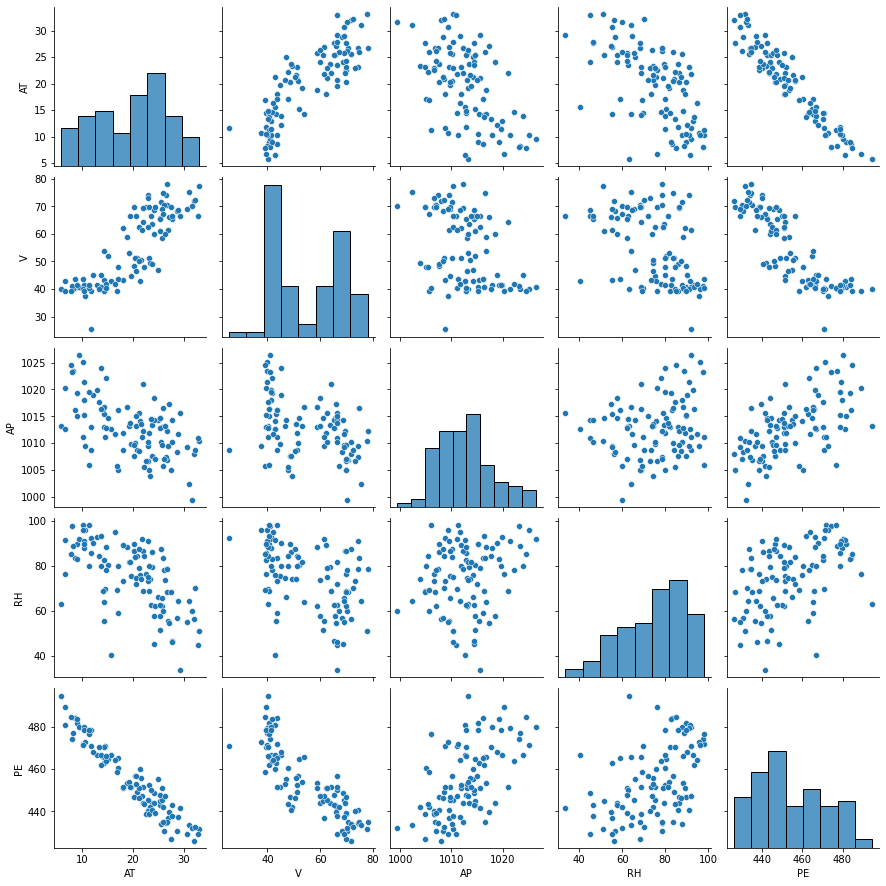

In [49]:
sns.pairplot(data=df_plant.sample(100))

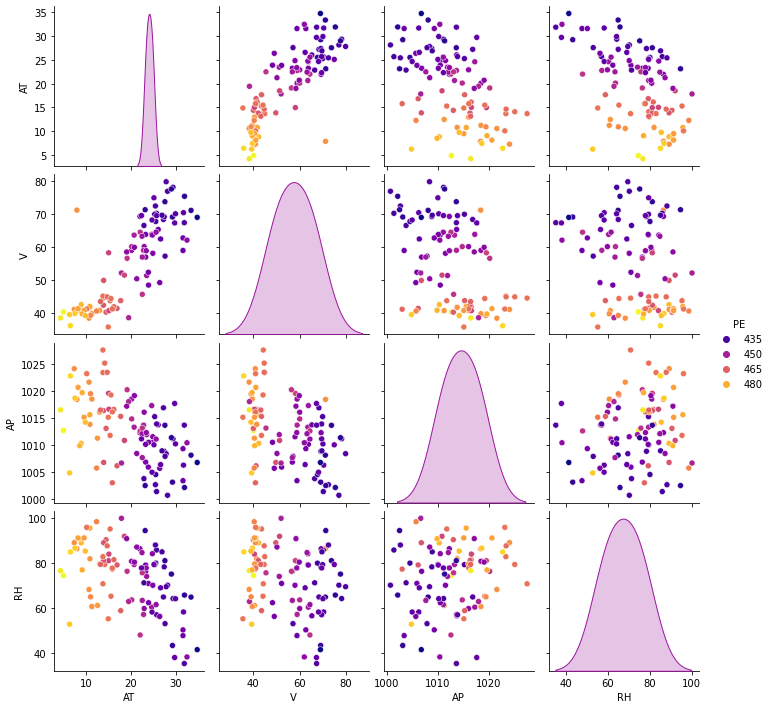

In [40]:
sns.pairplot(data=df_plant.sample(100), hue="PE", palette="plasma")

### Step 3: Clean data as necessary

In [42]:
df_plant_clean = df_plant[df_plant['RH'] <= 100.0].copy()
df_plant_clean.describe()

,AT,V,AP,RH,PE
count,9513.000000,9513.000000,9513.000000,9513.000000,9513.000000
mean,19.673947,54.346554,1013.285378,73.154065,454.345872
std,7.464444,12.723191,5.938199,14.499145,17.102459
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.520000,41.700000,1009.130000,63.240000,439.710000
50%,20.450000,52.360000,1012.970000,74.850000,451.460000
75%,25.760000,66.540000,1017.290000,84.650000,468.460000
max,37.110000,81.560000,1033.300000,100.000000,495.760000


In [44]:
df_plant_clean = df_plant_clean.dropna()
df_plant_clean.describe()

,AT,V,AP,RH,PE
count,9513.000000,9513.000000,9513.000000,9513.000000,9513.000000
mean,19.673947,54.346554,1013.285378,73.154065,454.345872
std,7.464444,12.723191,5.938199,14.499145,17.102459
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.520000,41.700000,1009.130000,63.240000,439.710000
50%,20.450000,52.360000,1012.970000,74.850000,451.460000
75%,25.760000,66.540000,1017.290000,84.650000,468.460000
max,37.110000,81.560000,1033.300000,100.000000,495.760000


### Step 4: Separate data and targets

In [46]:
df_plant_data = df_plant_clean.drop("PE", axis=1)
df_plant_data.describe()

,AT,V,AP,RH
count,9513.000000,9513.000000,9513.000000,9513.000000
mean,19.673947,54.346554,1013.285378,73.154065
std,7.464444,12.723191,5.938199,14.499145
min,1.810000,25.360000,992.890000,25.560000
25%,13.520000,41.700000,1009.130000,63.240000
50%,20.450000,52.360000,1012.970000,74.850000
75%,25.760000,66.540000,1017.290000,84.650000
max,37.110000,81.560000,1033.300000,100.000000


In [47]:
df_plant_target = df_plant_clean["PE"]
df_plant_target.describe()

count    9513.000000
mean      454.345872
std        17.102459
min       420.260000
25%       439.710000
50%       451.460000
75%       468.460000
max       495.760000
Name: PE, dtype: float64

### Step 5: Check selection algorithm (linear vs. nonlinear model)

Select best features for use with linear techniques (`f_regression`)

In [48]:
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression

feature_selector = SelectKBest(f_regression, k=4)
feature_selector.fit_transform(df_plant_data, df_plant_target)
zipped_results = zip(feature_selector.feature_names_in_,
                     feature_selector.scores_,
                     feature_selector.pvalues_)
sorted_zip = sorted(zipped_results, key=lambda tp: tp[1], reverse=True)
print("feature results from f_regression (linear assumption):")
for feature_name, feature_score, feature_pvalue in sorted_zip:
    print(f"{feature_name}: score of {feature_score} with p-value {feature_pvalue}")

feature results from f_regression (linear assumption):
AT: score of 85113.11464778033 with p-value 0.0
V: score of 29677.514668344207 with p-value 0.0
AP: score of 3530.701609866274 with p-value 0.0
RH: score of 1725.614688254191 with p-value 0.0


Select best features for use with nonlinear techniques (`mutual_info_regression`)

In [50]:
feature_selector = SelectKBest(mutual_info_regression, k=4)
feature_selector.fit_transform(df_plant_data, df_plant_target)
zipped_results = zip(feature_selector.feature_names_in_,
                     feature_selector.scores_)
sorted_zip = sorted(zipped_results, key=lambda tp: tp[1], reverse=True)
print("feature results from mutual_info_regression (nonlinear assumption):")
for feature_name, feature_score in sorted_zip:
    print(f"{feature_name}: score of {feature_score}")

feature results from mutual_info_regression (nonlinear assumption):
AT: score of 1.1690470284275118
V: score of 0.9448554140093846
AP: score of 0.28697281975046973
RH: score of 0.11467700878248266


### Step 6: Build Pipeline (scaler and classifier combined) and select model

In [81]:
import sklearn.pipeline
import sklearn.preprocessing
import sklearn.linear_model
import sklearn.model_selection
import sklearn.svm
import sklearn.ensemble
from typing import Dict, Any


NUM_CORES = 4

In [82]:
def run_cross_validation(pipeline: sklearn.pipeline.Pipeline,
                         dataset_data: pd.DataFrame,
                         dataset_target: pd.Series,
                         num_cores: int) -> Dict[str, Any]:
    """
    Uses sklearn.model_selection.cross_validate() to run cross-validation.

    :param pipeline: the full regression pipeline
    :param dataset_data: the pandas dataframe containing just the features
    :param dataset_target: the pandas series containing just the target
    """
    cv_results = sklearn.model_selection.cross_validate(
        pipeline, dataset_data, dataset_target,
        cv=5, verbose=0, n_jobs=num_cores,
        return_train_score=True, return_estimator=False,
        scoring=('r2', 'neg_mean_absolute_error'))

    for key, value in cv_results.items():
        print(f"{key}: {value}")

    return cv_results

Let's try good ol' ElasticNet linear regression:

In [75]:
pipeline_items = [('selector', SelectKBest(f_regression, k=2)),
                  ('regressor', sklearn.linear_model.ElasticNet())]
full_regressor = sklearn.pipeline.Pipeline(pipeline_items)
run_cross_validation(full_regressor, df_plant_data, df_plant_target, NUM_CORES)

fit_time: [0.01251245 0.01178217 0.01187539 0.01139927 0.0118711 ]
score_time: [0.00861216 0.00920439 0.00380349 0.00325513 0.00601697]
test_r2: [0.91936748 0.91060406 0.91446728 0.91472266 0.92079733]
train_r2: [0.91539147 0.91761407 0.9165864  0.91649328 0.9148942 ]
test_neg_mean_absolute_error: [-3.85423873 -3.94981324 -3.97911447 -3.94344754 -3.88053366]
train_neg_mean_absolute_error: [-3.93334907 -3.90998852 -3.90456965 -3.91685544 -3.93196661]


{'fit_time': array([0.01251245, 0.01178217, 0.01187539, 0.01139927, 0.0118711 ]),
 'score_time': array([0.00861216, 0.00920439, 0.00380349, 0.00325513, 0.00601697]),
 'test_r2': array([0.91936748, 0.91060406, 0.91446728, 0.91472266, 0.92079733]),
 'train_r2': array([0.91539147, 0.91761407, 0.9165864 , 0.91649328, 0.9148942 ]),
 'test_neg_mean_absolute_error': array([-3.85423873, -3.94981324, -3.97911447, -3.94344754, -3.88053366]),
 'train_neg_mean_absolute_error': array([-3.93334907, -3.90998852, -3.90456965, -3.91685544, -3.93196661])}

Let's try seeing if using all four features will help the ElasticNet:

In [76]:
pipeline_items = [('selector', SelectKBest(f_regression, k=4)),
                  ('regressor', sklearn.linear_model.ElasticNet())]
full_regressor = sklearn.pipeline.Pipeline(pipeline_items)
run_cross_validation(full_regressor, df_plant_data, df_plant_target, NUM_CORES)

fit_time: [0.01026273 0.0154655  0.01735711 0.02149701 0.01093841]
score_time: [0.00457644 0.0050087  0.00275064 0.00764728 0.00885844]
test_r2: [0.92962572 0.9200506  0.93011654 0.92746944 0.93286648]
train_r2: [0.92798032 0.93039666 0.92760604 0.92837264 0.92696767]
test_neg_mean_absolute_error: [-3.6040157  -3.76485253 -3.62991377 -3.67410762 -3.60030318]
train_neg_mean_absolute_error: [-3.65860989 -3.62042817 -3.6601746  -3.64940689 -3.66559113]


{'fit_time': array([0.01026273, 0.0154655 , 0.01735711, 0.02149701, 0.01093841]),
 'score_time': array([0.00457644, 0.0050087 , 0.00275064, 0.00764728, 0.00885844]),
 'test_r2': array([0.92962572, 0.9200506 , 0.93011654, 0.92746944, 0.93286648]),
 'train_r2': array([0.92798032, 0.93039666, 0.92760604, 0.92837264, 0.92696767]),
 'test_neg_mean_absolute_error': array([-3.6040157 , -3.76485253, -3.62991377, -3.67410762, -3.60030318]),
 'train_neg_mean_absolute_error': array([-3.65860989, -3.62042817, -3.6601746 , -3.64940689, -3.66559113])}

Let's try this dataset with a linear SVM:

In [79]:
pipeline_items = [('selector', SelectKBest(f_regression, k=2)),
                  ('regressor', sklearn.svm.SVR(kernel='linear'))]
full_regressor = sklearn.pipeline.Pipeline(pipeline_items)
run_cross_validation(full_regressor, df_plant_data, df_plant_target, NUM_CORES)

fit_time: [7.93905377 7.60755372 8.0153966  7.90003633 9.70824265]
score_time: [0.33357906 0.33377028 0.35232592 0.33425355 0.33322597]
test_r2: [0.91855323 0.9099594  0.91426015 0.9152117  0.92098449]
train_r2: [0.9151594  0.91736676 0.91644264 0.91633514 0.9147199 ]
test_neg_mean_absolute_error: [-3.85629134 -3.94127522 -3.9561471  -3.91132429 -3.84079676]
train_neg_mean_absolute_error: [-3.90928649 -3.88809085 -3.88444171 -3.89549665 -3.91322206]


{'fit_time': array([7.93905377, 7.60755372, 8.0153966 , 7.90003633, 9.70824265]),
 'score_time': array([0.33357906, 0.33377028, 0.35232592, 0.33425355, 0.33322597]),
 'test_r2': array([0.91855323, 0.9099594 , 0.91426015, 0.9152117 , 0.92098449]),
 'train_r2': array([0.9151594 , 0.91736676, 0.91644264, 0.91633514, 0.9147199 ]),
 'test_neg_mean_absolute_error': array([-3.85629134, -3.94127522, -3.9561471 , -3.91132429, -3.84079676]),
 'train_neg_mean_absolute_error': array([-3.90928649, -3.88809085, -3.88444171, -3.89549665, -3.91322206])}

Now, try it with a nonlinear SVM:

In [88]:
pipeline_items = [('selector', SelectKBest(f_regression, k=2)),
                  ('scaler', sklearn.preprocessing.StandardScaler()),
                  ('regressor', sklearn.svm.SVR(kernel='rbf'))]
full_regressor = sklearn.pipeline.Pipeline(pipeline_items)
run_cross_validation(full_regressor, df_plant_data, df_plant_target, NUM_CORES)

fit_time: [3.49440289 3.56085777 3.38142753 3.36063552 3.40714049]
score_time: [1.68536186 1.76091862 1.78185582 1.76767778 1.72843456]
test_r2: [0.93445646 0.92488346 0.92892454 0.92963363 0.93399656]
train_r2: [0.92985569 0.93202281 0.93093923 0.93111678 0.92992603]
test_neg_mean_absolute_error: [-3.35022207 -3.47276825 -3.55329351 -3.48331678 -3.45287264]
train_neg_mean_absolute_error: [-3.47626188 -3.44763901 -3.42925132 -3.44453698 -3.45203739]


{'fit_time': array([3.49440289, 3.56085777, 3.38142753, 3.36063552, 3.40714049]),
 'score_time': array([1.68536186, 1.76091862, 1.78185582, 1.76767778, 1.72843456]),
 'test_r2': array([0.93445646, 0.92488346, 0.92892454, 0.92963363, 0.93399656]),
 'train_r2': array([0.92985569, 0.93202281, 0.93093923, 0.93111678, 0.92992603]),
 'test_neg_mean_absolute_error': array([-3.35022207, -3.47276825, -3.55329351, -3.48331678, -3.45287264]),
 'train_neg_mean_absolute_error': array([-3.47626188, -3.44763901, -3.42925132, -3.44453698, -3.45203739])}

We'll try a nice and explainable ensemble algorithm: Random Forest (forest of Decision Trees):

In [85]:
pipeline_items = [('selector', SelectKBest(f_regression, k=2)),
                  ('regressor', sklearn.ensemble.RandomForestRegressor())]
full_regressor = sklearn.pipeline.Pipeline(pipeline_items)
run_cross_validation(full_regressor, df_plant_data, df_plant_target, NUM_CORES)

fit_time: [1.64444637 1.61760879 1.68055582 1.59284329 1.5817399 ]
score_time: [0.08582711 0.08674026 0.08519769 0.08496976 0.08634567]
test_r2: [0.95569711 0.94611378 0.9548632  0.95188969 0.95529114]
train_r2: [0.99309104 0.99344832 0.99308565 0.99322108 0.99304912]
test_neg_mean_absolute_error: [-2.61325814 -2.70646056 -2.69458338 -2.72050794 -2.65473859]
train_neg_mean_absolute_error: [-1.00980697 -0.9957211  -1.01595466 -1.01476596 -1.01217247]


{'fit_time': array([1.64444637, 1.61760879, 1.68055582, 1.59284329, 1.5817399 ]),
 'score_time': array([0.08582711, 0.08674026, 0.08519769, 0.08496976, 0.08634567]),
 'test_r2': array([0.95569711, 0.94611378, 0.9548632 , 0.95188969, 0.95529114]),
 'train_r2': array([0.99309104, 0.99344832, 0.99308565, 0.99322108, 0.99304912]),
 'test_neg_mean_absolute_error': array([-2.61325814, -2.70646056, -2.69458338, -2.72050794, -2.65473859]),
 'train_neg_mean_absolute_error': array([-1.00980697, -0.9957211 , -1.01595466, -1.01476596, -1.01217247])}

In [87]:
pipeline_items = [('selector', SelectKBest(f_regression, k=4)),
                  ('regressor', sklearn.ensemble.RandomForestRegressor())]
full_regressor = sklearn.pipeline.Pipeline(pipeline_items)
run_cross_validation(full_regressor, df_plant_data, df_plant_target, NUM_CORES)

fit_time: [2.94093394 2.81744885 2.83952045 2.78627372 2.74138117]
score_time: [0.08830357 0.08671618 0.08931756 0.09944391 0.08801436]
test_r2: [0.96314442 0.95390725 0.96420408 0.96235277 0.964689  ]
train_r2: [0.99462901 0.99504682 0.99441893 0.99454593 0.9944692 ]
test_neg_mean_absolute_error: [-2.32162827 -2.41395901 -2.35882659 -2.39001404 -2.33532608]
train_neg_mean_absolute_error: [-0.88010761 -0.8658571  -0.88773604 -0.88669017 -0.88239335]


{'fit_time': array([2.94093394, 2.81744885, 2.83952045, 2.78627372, 2.74138117]),
 'score_time': array([0.08830357, 0.08671618, 0.08931756, 0.09944391, 0.08801436]),
 'test_r2': array([0.96314442, 0.95390725, 0.96420408, 0.96235277, 0.964689  ]),
 'train_r2': array([0.99462901, 0.99504682, 0.99441893, 0.99454593, 0.9944692 ]),
 'test_neg_mean_absolute_error': array([-2.32162827, -2.41395901, -2.35882659, -2.39001404, -2.33532608]),
 'train_neg_mean_absolute_error': array([-0.88010761, -0.8658571 , -0.88773604, -0.88669017, -0.88239335])}

Let's try a neural network!

### Step 7: Train final model on single shuffled train-test split

In [92]:
pipeline_items = [('selector', SelectKBest(f_regression, k=4)),
                  ('regressor', sklearn.ensemble.RandomForestRegressor())]
full_regressor = sklearn.pipeline.Pipeline(pipeline_items)
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(
    df_plant_data, df_plant_target, test_size=0.2, random_state=7)
full_regressor.fit(x_train, y_train)
full_regressor.score(x_test, y_test)

0.961470001727122